In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


In [3]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]




# Stacked Bar Charts

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


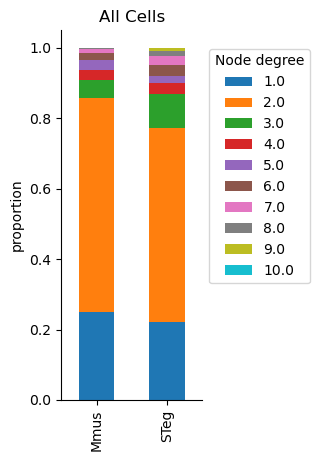

In [23]:
# all cells
mm_idx = metadata[metadata["species"]=="MMus"].index.values
st_idx = metadata[metadata["species"]=="STeg"].index.values

mm_all = pd.concat(np.take(omc_type, mm_idx))
st_all = pd.concat(np.take(omc_type, st_idx))
mm_meta = {"mice":["ALL"], "species":["MMus"], "dataset":["ALL"]}
st_meta = {"mice":["ALL"], "species":["STeg"], "dataset":["ALL"]}

mm_nodes = dfs_to_node_proportions([mm_all], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_all], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All Cells")



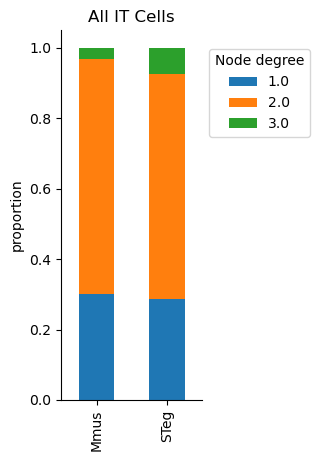

In [25]:
# IT cells
mm_it = mm_all[mm_all['type']=="IT"]
st_it = st_all[st_all['type']=="IT"]

mm_nodes = dfs_to_node_proportions([mm_it], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_it], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All IT Cells")



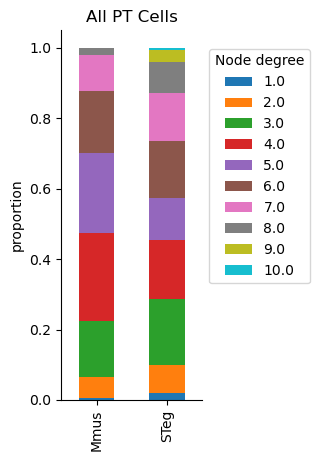

In [27]:
# PT cells
mm_pt = mm_all[mm_all['type']=="PT"]
st_pt = st_all[st_all['type']=="PT"]

mm_nodes = dfs_to_node_proportions([mm_pt], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_pt], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All PT Cells")



# P(A|B)